<p style="font-size:18px; font-weight:bold;">필수 과제 가이드</p>
<p style="font-size:16px; font-weight:bold;">타이타닉 생존자 예측</p>
<p style="font-size:12px; font-weight:bold;">주제</p>
<p style="font-size:12px">타이타닉 탑승객 데이터셋 활용해 생존자를 예측하는 모델을 만드는 프로젝트</p>
<p style="font-size:12px; font-weight:bold;">목표</p>
<p style="font-size:12px">다양한 모델을 통해서 생존자를 예측하는 모델을 학습시키는 것이 목표입니다. 과제는 순서대로 풀어주세요.</p>


#### 1. 데이터 셋 불러오기
- seaborn 라이브러리에 있는 titanic 데이터를 불러옵니다.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [36]:
import matplotlib.pyplot as plt

In [37]:
titanic = sns.load_dataset('titanic')

#### 2. feature 분석
-    데이터를 잘 불러오셨다면 해당 데이터의 feature를 파악해야합니다. 데이터의 feature를 파악하기 위해 아래의 다양한 feature 분석을 수행해주세요. 

##### 2-1. head 함수를 이용해 데이터 프레임의 첫 5행을 출력하여 어떤 feature들이 있는지 확인해주세요. 

In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### 2-2. describe 함수를 통해서 기본적인 통계를 확인해주세요.

In [39]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 2-3. describe 함수를 통해 확인할 수 있는 count, std, min, 25%, 50%, 75%, max 가 각각 무슨 뜻인지 주석 혹은 markdown 블록으로 간단히 설명해주세요.

- **count:** 결측치(NaN)가 제거된 데이터의 수
- **std:** 표준편차. 데이터의 흩어짐을 나타냄, 이 값이 클수록 데이터가 넓게 퍼져있다
- **min:** 데이터에서 열의 최솟값
- **25%:** 1사분위 수. 데이터의 하위 25% 값
- **50%:** 데이터의 중앙 값
- **75%:** 3사분위 수. 데이터의 상위 25% 값
- **max:** 데이터에서 열의 최대 값

[추가 설명: 뒤에 이 자료를 토대로 한 그래프가 나옴]
- **survived**는 사망자(0) 생존자(1)로 표시되어 있다. titanic.describe()을 통한 survived를 보면 승객 중 절반 이상은 사망하였고, 전체 승객의 상위 25%는 생존했음을 알 수 있다.
- **pclass**는 승객의 좌석 등급을 나타내는 변수이다. 이 변수는 1(1등석) / 2(2등석) / 3(3등석)으로 구성 되어 있다. 
- **sibsp:** 형제자매 및 배우자의 수 이다.
- **parch** 부모 및 자녀의 수 이다.
- **fare:** 운임 요금이다.


##### 2-4. isnull() 함수와 sum() 함수를 이용해 각 열의 결측치 갯수를 확인해주세요.

In [40]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**설명:** age는 결측치가 177개, deck은 688개, embark_town은 2개이다. 유독 deck의 결측치가 많은 이유는 데이터 수집 과정에서 당시 티켓에 deck(승객이 탑승한 선실의 갑판)의 정보가 기록되지 않은 경우가 많기 때문이다.

#### 3. feature engineering
-    feature engineering은 모델의 성능을 향상시키기 위해 중요한 단계입니다. 2번 feature 분석에서 얻은 데이터에 대한 이해를 바탕으로 아래의 feature engineering을 수행해주세요. 

##### 3-1. 결측치 처리
- Age(나이)의 결측치는 중앙값으로, Embarked(승선 항구)의 결측치는 최빈값으로 대체해주세요. 
- 모두 대체한 후에, 대체 결과를 isnull() 함수와 sum()  함수를 이용해서 확인해주세요. 

In [41]:
#수치형 데이터의 중앙값을 계산 혹은 반환해주는 .median()사용
#계산된 중앙값을 fillna를 사용 대체, inplace = True로 변경된 값 바로 저장
titanic_age = titanic['age'].median()
titanic['age'].fillna(titanic_age, inplace = True)

#최빈값을 계산 혹은 반환해주는 .mode 사용.(리스트로 반환하기 때문에 첫번째 값인 [0]을 사용)
#계산된 최빈값을 fillna를 사용해 대체, inplace = True로 변경된 값 바로 저장
titanic_embarked = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(titanic_embarked, inplace = True)

#대체 결과 확인
print(titanic['age'].isnull().sum())
print(titanic['embarked'].isnull().sum())

0
0


##### 3-2. 수치형으로 인코딩
- Sex(성별)를 남자는 0, 여자는 1로 변환해주세요. 
- alive(생존여부)를 yes는 1, no는 0으로 변환해주세요. 
- Embarked(승선 항구)는 ‘C’는 0으로, Q는 1으로, ‘S’는 2로 변환해주세요. 모두 변환한 후에, 변환 결과를 head 함수를 이용해 확인해주세요. 

In [42]:
#삼항 연산자(ternary operator) 구조에 기인하여, 값1 if 조건 else 값2으로 lambda 함수 생성 및 값 조정
titanic['sex'] = titanic['sex'].apply(lambda x : 0 if x == "male" else 1)
titanic['alive'] = titanic['alive'].apply(lambda x: 1 if x == 'yes' else 0)
titanic['embarked'] = titanic['embarked'].apply(lambda x:0 if x == 'C' else (1 if x == 'Q' else 2))

#출력 .head()
print(titanic['sex'].head())
print(titanic['alive'].head())
print(titanic['embarked'].head())

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64
0    0
1    1
2    1
3    1
4    0
Name: alive, dtype: int64
0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64


##### 3-3. 새로운 feature 생성
- SibSip(타이타닉호에 동승한 자매 및 배우자의 수), Parch(타이타닉호에 동승한 부모 및 자식의 수)를 통해서 family_size(가족크기)를 생성해주세요.
- 새로운 feature를 head 함수를 이용해 확인해주세요.

In [43]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 # +1은 '나'
#family_size 는 나 + 배우자,형제자매 + 부모,자식 수의 총 합

print(titanic['family_size'].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


#### 4. 모델 학습시키기 (Logistic Regression, Random Forest, XGBoost)

##### 4-1. 모델 학습 준비
- 이제 모델을 학습시키기 위한 데이터를 준비하겠습니다.
- 학습에 필요한 feature은 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', ‘family_size’ 입니다.
- feature과 target을 분리해주세요.  그 다음 데이터 스케일링을 진행해주세요. 


In [44]:
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size']]
X = titanic.drop('survived', axis=1) # feature #.drop()으로 survived 열을 뺌
y = titanic['survived'] # target

- 이제 **Logistic Regression, Random Forest, XGBoost를 통해서 생존자를 예측하는 모델**을 학습하세요. 
- 학습이 끝난 뒤 **Logistic Regression과 Random Forest는 모델 accuracy**를 통해, **XGBoost는 mean squared error**를 통해 test data를 예측하세요. 

##### 4-2. Logistic Regression

In [45]:
# Logistic Regression: Best accuracy 찾기
best_accuracy = 0
best_state = 0
best_model = None  # 가장 성능 좋은 모델을 저장할 변수

for x in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=x)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    logi = LogisticRegression()
    logi.fit(X_train, y_train)

    y_answer = logi.predict(X_test)
    accuracy = accuracy_score(y_test, y_answer)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_state = x
        best_model = logi  # 현재 모델을 가장 성능 좋은 모델로 저장

print(f'Best accuracy: {best_accuracy}, Best state: {best_state}')
print(f'Classification Report: \n{classification_report(y_test, y_answer)}')

Best accuracy: 0.8603351955307262, Best state: 18
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       113
           1       0.67      0.62      0.65        66

    accuracy                           0.75       179
   macro avg       0.73      0.72      0.73       179
weighted avg       0.75      0.75      0.75       179



In [46]:
#그냥 넣고싶었던 것
mse = mean_squared_error(y_test, y_answer)
r2 = r2_score(y_test, y_answer)
print(f'Mean Squared Error: {mse}')
print(f'r2score: {r2}')

Mean Squared Error: 0.25139664804469275
r2score: -0.08004827031375683


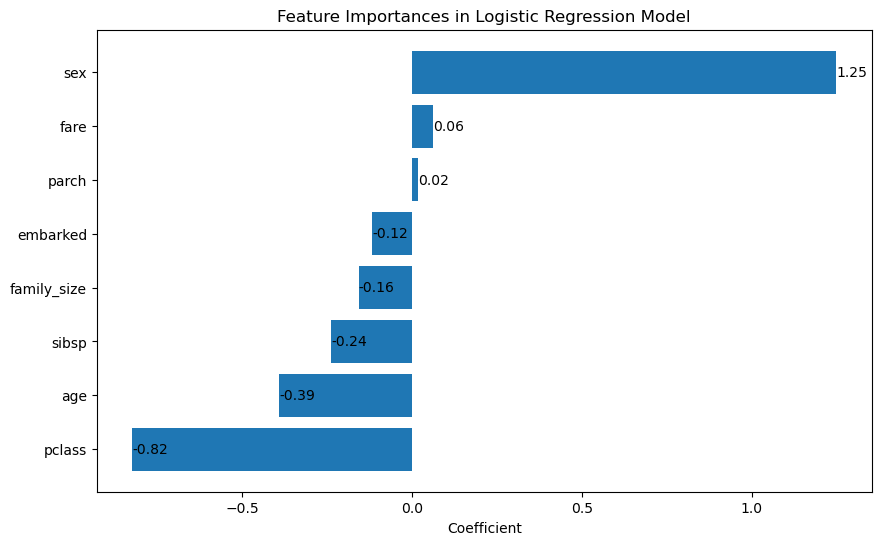

In [47]:
import matplotlib.pyplot as plt

# 회귀 계수(coefficient) 추출 및 시각화
coefficients = best_model.coef_[0]  # 가장 좋은 모델의 회귀 계수 추출

# 변수명과 회귀 계수를 데이터프레임으로 정리
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importances = feature_importances.sort_values(by='Coefficient', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importances['Feature'], feature_importances['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importances in Logistic Regression Model')
plt.gca().invert_yaxis()  # 중요도 높은 순으로 보기 위해 축 반전

# 각 막대에 숫자 추가
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.show()

**해석**

**로지스틱 회귀 모델에서의 변수 중요도 분석**

이번 분석에서는 로지스틱 회귀 모델에서 각 변수의 중요도를 회귀 계수(Coefficient)를 통해 시각화하였습니다. 양의 회귀 계수는 변수와 종속 변수 간의 양의 상관관계를, 음의 회귀 계수는 음의 상관관계를 의미합니다.

**그래프에서 관찰할 수 있는 주요 사항은 다음과 같습니다:**

**1. Sex(성별):** 성별 변수는 가장 큰 possitive coefficent를 가지며, 그 중 여성('여성'이 1로 인코딩 되어있음)이 생존할 가능성이 남성보다 높음을 나타냅니다. 따라서 성별이 생존률에 중요한 영향을 미치는 변수임을 알 수 있습니다.

**2. Pclass (객실 등급):** 객실 등급 변수는 높은 negative coefficient(-0.82)를 가지고 있습니다. 여기서 negative coefficient가 의미하는 것은, **숫자가 작을수록 높은 등급**을 나타낸다는 점 입니다(1등석, 2등석, 3등석). 즉, 객실 등급이 1등석(가장 높은 등급)일 때 생존률이 더 높아짐을 나타냅니다. 이 결과는 1등석 승객들이 상대적으로 더 높은 생존률을 가졌음을 시사합니다.

**3. Age(나이):** 나이는 -0.39의 계수를 가지며, 이는 연령이 증가할 수록 생존률에 부정적인 영향을 미친다고 할 수 있습니다. 


##### 4-3. Decision Tree

In [48]:
#이번에는 다르게 줘봤습니다. for을 하나 더 써서 최적의 test size와 그에 상응하는 random state를 찾아 최고의 정확도를  찾아내는 것이 목표입니다.
# Decision Tree: Best accuracy 찾기
best_accuracy = 0
best_state = 0
best_test_size = 0
best_model = None  # 가장 성능 좋은 모델을 저장할 변수

for test_size in np.arange(0.1, 1, 0.05):
    for x in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=x)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        tree = DecisionTreeClassifier(random_state=x)
        tree.fit(X_train, y_train)

        y_answer = tree.predict(X_test)
        accuracy = accuracy_score(y_test, y_answer)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_test_size = test_size
            best_state = x
            best_model = tree  # 가장 성능 좋은 모델을 저장

# 평가
print(f'Best accuracy: {best_accuracy}')
print(f'Best test size: {best_test_size}')
print(f'Best state: {best_state}')

Best accuracy: 0.8777777777777778
Best test size: 0.1
Best state: 72


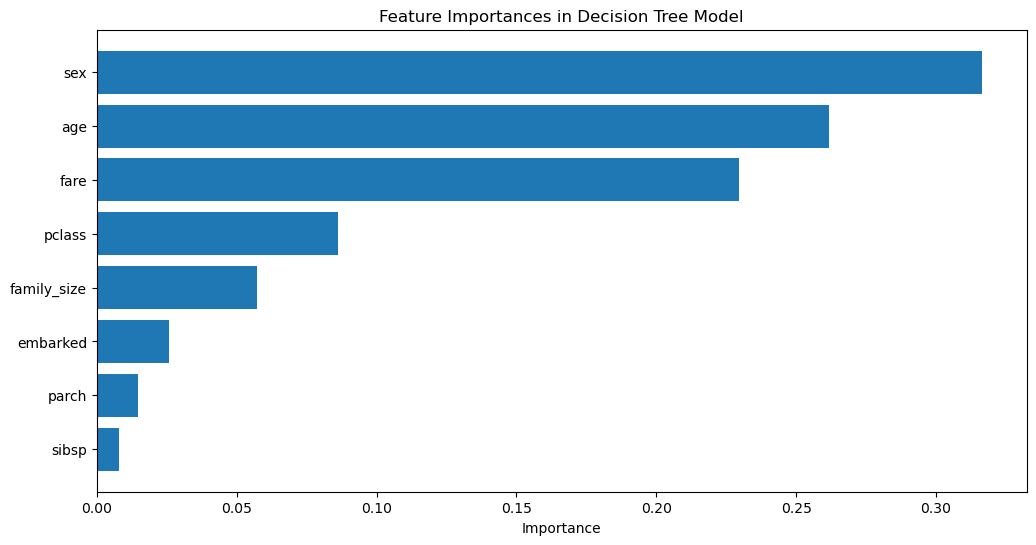

In [49]:
# 변수 중요도 추출 및 시각화
feature_importances = best_model.feature_importances_

# 변수명과 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 보기 위해 축 반전
plt.show()

##### 4-4. XGBoost

In [50]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, seed=42)  # random_state 대신 seed 사용

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost 모델의 MSE: {mse_xgb}')

XGBoost 모델의 MSE: 0.12981004899201257


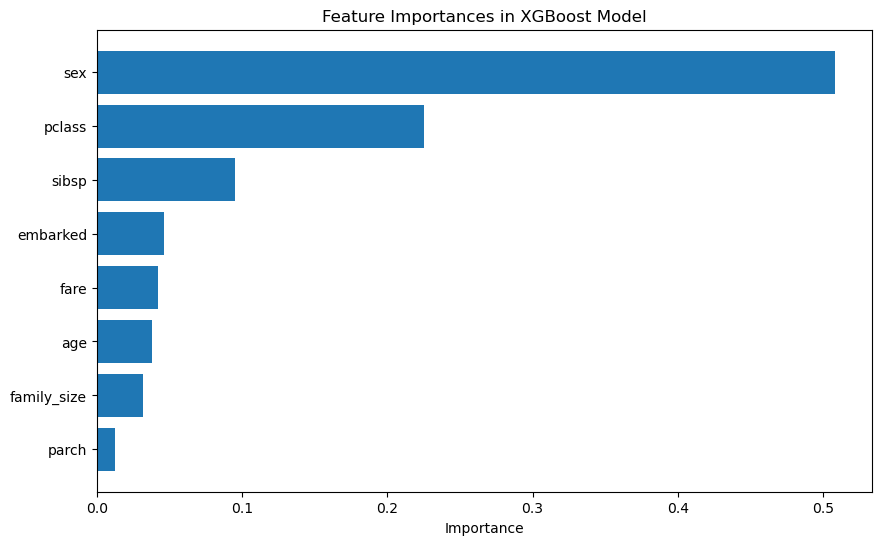

In [51]:
# 각 변수의 중요도 추출
importances = xgb_model.feature_importances_

# 변수명과 중요도를 데이터프레임으로 정리
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()  # 중요도 높은 순으로 보기 위해 축 반전
plt.show()